<a href="https://colab.research.google.com/github/duonghung86/Injury-severity-classification/blob/main/VCA_3_0_binary_models_MLs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import time
from collections import Counter

# Import dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/duonghung86/Injury-severity-classification/main/final%20data%20nomap.csv')
print(df.shape)
df.head()

(468844, 41)


,Unit_Nbr,Prsn_Type_ID,Prsn_Occpnt_Pos_ID,Prsn_Injry_Sev_ID,Prsn_Age,Prsn_Ethnicity_ID,Prsn_Gndr_ID,Prsn_Ejct_ID,Prsn_Rest_ID,Prsn_Airbag_ID,...,Veh_Mod_Year,Veh_Color_ID,Veh_Make_ID,Veh_Mod_ID,Veh_Body_Styl_ID,Crash_month,Crash_day,Crash_hour,Crash_min,Weekend
0,1,1,1,0,48,1,1,1,1,2,...,2002,21,107,547,69,6,15,11,0,1
1,2,1,1,2,58,1,2,1,1,3,...,2012,17,91,629,30,6,15,11,0,1
2,1,1,1,0,68,1,1,1,1,2,...,1996,21,672,2103,87,6,12,9,53,0
3,3,1,1,0,67,1,2,1,1,4,...,2016,21,44,605,69,6,12,9,53,0
4,1,1,1,0,36,2,2,1,1,2,...,2014,2,91,380,104,6,4,15,7,0


In [3]:
y=df['Prsn_Injry_Sev_ID']
y.value_counts()

0    384890
1     53032
2     24859
3      4959
4      1104
Name: Prsn_Injry_Sev_ID, dtype: int64

In [4]:
X = df.drop(columns=['Prsn_Injry_Sev_ID'])
X.shape

(468844, 40)

# Prepare 5 different data set and labels:

1. No injury (0) vs injury (1/2/3/4)
2. Possible injury (1) vs real injury (2/3/4)
3. Non-incapaciting (2) vs severe injury (3/4)
4. Incapacitating (3) vs Fatal (4) 

In [5]:
sets = {}
for i in range(4):
  sub_df = df[df.Prsn_Injry_Sev_ID.isin(np.arange(i,5))].copy()
  y_i = np.where(sub_df.Prsn_Injry_Sev_ID==i,0,1)
  print(Counter(y_i))
  X_i = sub_df.drop(columns=['Prsn_Injry_Sev_ID']).copy()
  print(X_i.shape)
  sets[i] = (X_i,y_i)

Counter({0: 384890, 1: 83954})
(468844, 40)
Counter({0: 53032, 1: 30922})
(83954, 40)
Counter({0: 24859, 1: 6063})
(30922, 40)
Counter({0: 4959, 1: 1104})
(6063, 40)


In [6]:
sets[1][0]

,Unit_Nbr,Prsn_Type_ID,Prsn_Occpnt_Pos_ID,Prsn_Age,Prsn_Ethnicity_ID,Prsn_Gndr_ID,Prsn_Ejct_ID,Prsn_Rest_ID,Prsn_Airbag_ID,Prsn_Helmet_ID,...,Veh_Mod_Year,Veh_Color_ID,Veh_Make_ID,Veh_Mod_ID,Veh_Body_Styl_ID,Crash_month,Crash_day,Crash_hour,Crash_min,Weekend
1,2,1,1,58,1,2,1,1,3,97,...,2012,17,91,629,30,6,15,11,0,1
7,1,5,1,61,1,1,4,11,1,4,...,2013,2,42,3118,71,6,1,0,35,1
8,1,5,1,49,3,1,4,11,1,4,...,2019,3,42,3174,71,6,1,2,8,1
10,1,5,1,25,4,1,4,11,1,1,...,2018,2,44,4803,71,6,1,2,26,1
11,1,1,1,53,1,1,1,1,8,97,...,2007,16,14,2180,100,6,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468800,2,1,1,50,0,1,1,1,8,97,...,2015,5,106,1373,69,11,30,8,28,1
468802,1,1,1,68,1,1,1,1,2,97,...,2018,9,91,581,104,11,30,9,50,1
468820,1,1,1,25,3,2,1,1,2,97,...,2008,16,37,1097,104,11,21,9,0,0
468833,1,1,1,71,2,2,1,1,2,97,...,1998,10,107,57,100,11,30,11,6,1


## Function to compute performance


In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import auc

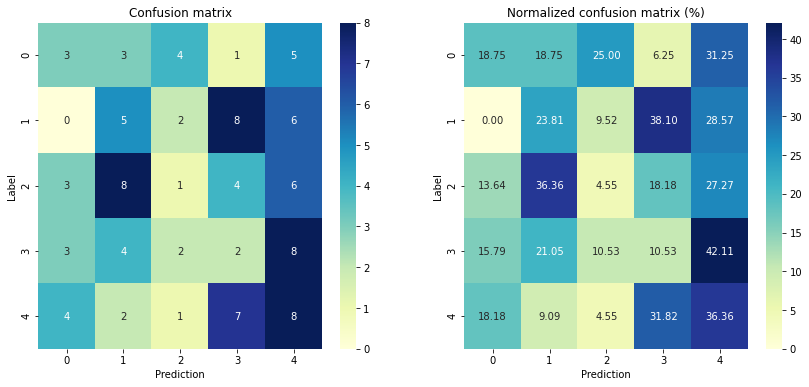

[0.19,
 0.1875,
 0.23809523809523808,
 0.045454545454545456,
 0.10526315789473684,
 0.36363636363636365,
 0.15067964916575147]

In [9]:
def get_accs(label,prediction, show=True):
    cm = confusion_matrix(label,prediction)
    length = cm.shape[0]
    num_cases = len(label)
    # global accuracy
    glb_acc = np.trace(cm)/len(label)
    ind_accs = cm/np.sum(cm,axis=1)[:, np.newaxis]
    accs = [ind_accs[i,i] for i in range(length)]
    accs.insert(0,glb_acc)
    # G-mean
    accs.append(geometric_mean_score(label, prediction,correction=0.001))

    if show:
        plt.figure(figsize=(14, 6))
        plt.subplot(1,2,1)
        sns.heatmap(cm, xticklabels=np.arange(length), yticklabels=np.arange(length), 
                    annot=True, fmt='g',cmap="YlGnBu")
        plt.xlabel('Prediction')
        plt.ylabel('Label')
        plt.title('Confusion matrix')
        plt.subplot(1,2,2)
        sns.heatmap(ind_accs*100, xticklabels=np.arange(length), yticklabels=np.arange(length), 
                    annot=True, fmt='.2f',cmap="YlGnBu")
        plt.xlabel('Prediction')
        plt.ylabel('Label')
        plt.title('Normalized confusion matrix (%)')
        plt.show()
    return accs
get_accs(np.random.randint(5, size=100),np.random.randint(5, size=100))

# Run 4 binary model without any techniques

## Function to train a model

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
def prepare_data(X_dat,label):
  # Split data set 
  X_train, X_test, y_train, y_test = train_test_split(X_dat,label,test_size=0.2,stratify=label, random_state=48)
  #print('Training features shape:', X_train.shape)
  #print('Test features shape:', X_test.shape)
  
  # Standardize the data 
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  return X_train, X_test, y_train, y_test

In [12]:
def train_model(X_tr, X_te, y_tr, y_te, model):

  # and then train it with Logistic Regression
  start = time.time()
  model.fit(X_tr, y_tr)
  # use the model to make predictions with the test data
  y_pred = model.predict(X_te)
  end= time.time()

  # get the evaluation metrics
  result = get_accs(y_te,y_pred,False)
  result.append(end-start)
  return result
X_train, X_test, y_train, y_test = prepare_data(sets[3][0],sets[3][1])
train_model(X_train, X_test, y_train, y_test, SGDClassifier(loss="hinge", penalty="l2", max_iter=5))

C:\Anaconda\envs\tf\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[0.8103874690849134,
 0.8891129032258065,
 0.45701357466063347,
 0.6374454221187251,
 0.03399395942687988]

## Train all 4 models with logistic regression

In [13]:
index = ['Global accuracy', 'Class 1','Class 2','G-mean','Training time']

In [14]:
rsts = pd.DataFrame()
for i in range(4):
  name = 'Model #{}'.format(i+1)
  #print(name)
  X_train, X_test, y_train, y_test = prepare_data(sets[i][0],sets[i][1])
  rsts[name] = train_model(X_train, X_test, y_train, y_test, LogisticRegression(solver = 'lbfgs'))
  
rsts.index = index
rsts

,Model #1,Model #2,Model #3,Model #4
Global accuracy,0.830264,0.677268,0.817138,0.845012
Class 1,0.976630,0.903460,0.969027,0.963710
Class 2,0.159252,0.289295,0.194559,0.312217
G-mean,0.394373,0.511240,0.434204,0.548531
Training time,1.929008,0.260019,0.150997,0.088007


## Train 4 models with 5 different ML algorithms

In [15]:
def create_ML(cw = None):
  LR = LogisticRegression(solver = 'lbfgs',class_weight=cw)
  DT = DecisionTreeClassifier(random_state=0,class_weight=cw)
  RF = RandomForestClassifier(max_depth=2, random_state=0,class_weight=cw)
  GNB = GaussianNB()
  SGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=5,class_weight=cw)
  clfs = [LR,DT,RF,GNB,SGD]
  names = ['LR','DT','RF','GNB','SGD']
  return dict(zip(names, clfs)) 
create_ML()

{'LR': LogisticRegression(),
 'DT': DecisionTreeClassifier(random_state=0),
 'RF': RandomForestClassifier(max_depth=2, random_state=0),
 'GNB': GaussianNB(),
 'SGD': SGDClassifier(max_iter=5)}

In [16]:
rsts = pd.DataFrame()
for i in range(4):
  MLs = create_ML()
  for clf_name, clf in MLs.items():
    name = '{0} #{1}'.format(clf_name,i+1)
    print(name)
    try:
      X_train, X_test, y_train, y_test = prepare_data(sets[i][0],sets[i][1])
      rsts[name] = train_model(X_train, X_test, y_train, y_test, clf)
    except Exception as e: print(e)
    
rsts.index = index
rsts

LR #1
DT #1
RF #1
GNB #1
SGD #1


C:\Anaconda\envs\tf\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


LR #2
DT #2
RF #2
GNB #2
SGD #2


C:\Anaconda\envs\tf\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


LR #3
DT #3
RF #3
GNB #3
SGD #3


C:\Anaconda\envs\tf\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


LR #4
DT #4
RF #4
GNB #4
SGD #4


C:\Anaconda\envs\tf\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


,LR #1,DT #1,RF #1,GNB #1,SGD #1,LR #2,DT #2,RF #2,GNB #2,SGD #2,LR #3,DT #3,RF #3,GNB #3,SGD #3,LR #4,DT #4,RF #4,GNB #4,SGD #4
Global accuracy,0.830264,0.744297,0.826457,0.797833,0.826201,0.677268,0.598237,0.654994,0.658150,0.603240,0.817138,0.732902,0.805174,0.793371,0.774939,0.845012,0.763397,0.817807,0.204452,0.822754
Class 1,0.976630,0.833485,0.998597,0.912559,0.997675,0.903460,0.679457,0.984727,0.940228,0.794947,0.969027,0.822204,0.999799,0.909694,0.906275,0.963710,0.840726,1.000000,0.032258,0.955645
Class 2,0.159252,0.335418,0.037282,0.271872,0.040081,0.289295,0.458926,0.089424,0.174321,0.274418,0.194559,0.366859,0.007420,0.316570,0.236603,0.312217,0.416290,0.000000,0.977376,0.226244
G-mean,0.394373,0.528740,0.192950,0.498096,0.199969,0.511240,0.558409,0.296747,0.404847,0.467063,0.434204,0.549211,0.086129,0.536640,0.463064,0.548531,0.591596,0.031623,0.177562,0.464983
Training time,2.116997,17.497002,29.572001,0.634028,0.960001,0.216004,2.017999,3.265006,0.111999,0.140035,0.164998,0.597000,1.206025,0.043000,0.046003,0.060000,0.099003,0.429999,0.007998,0.007995


Print the best performance

In [17]:
best_rst = []
for i in range(4):
  algo = rsts.loc['G-mean'][i*5:i*5+5].idxmax()
  best_rst.append(algo)
best_rst = rsts[best_rst].copy()
best_rst

,DT #1,DT #2,DT #3,DT #4
Global accuracy,0.744297,0.598237,0.732902,0.763397
Class 1,0.833485,0.679457,0.822204,0.840726
Class 2,0.335418,0.458926,0.366859,0.416290
G-mean,0.528740,0.558409,0.549211,0.591596
Training time,17.497002,2.017999,0.597000,0.099003


# Run 4 binary models with class weights

In [18]:
rsts = pd.DataFrame()
for i in range(4):
  MLs = create_ML('balanced')
  X_train, X_test, y_train, y_test = prepare_data(sets[i][0],sets[i][1])
  print(Counter(sets[i][1]))
  for clf_name, clf in MLs.items():
    name = '{0} #{1}'.format(clf_name,i+1)
    print(name)
    try:

      rsts[name] = train_model(X_train, X_test, y_train, y_test, clf)
    except Exception as e: print(e)
    
rsts.index = index
rsts

Counter({0: 384890, 1: 83954})
LR #1
DT #1
RF #1
GNB #1
SGD #1


C:\Anaconda\envs\tf\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Counter({0: 53032, 1: 30922})
LR #2
DT #2
RF #2
GNB #2
SGD #2


C:\Anaconda\envs\tf\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Counter({0: 24859, 1: 6063})
LR #3
DT #3
RF #3
GNB #3
SGD #3


C:\Anaconda\envs\tf\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Counter({0: 4959, 1: 1104})
LR #4
DT #4
RF #4
GNB #4
SGD #4


C:\Anaconda\envs\tf\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


,LR #1,DT #1,RF #1,GNB #1,SGD #1,LR #2,DT #2,RF #2,GNB #2,SGD #2,LR #3,DT #3,RF #3,GNB #3,SGD #3,LR #4,DT #4,RF #4,GNB #4,SGD #4
Global accuracy,0.716345,0.752605,0.798185,0.797833,0.667545,0.640462,0.595378,0.656006,0.658150,0.587577,0.724656,0.737753,0.776880,0.793371,0.637833,0.767519,0.786480,0.734542,0.204452,0.653751
Class 1,0.751474,0.849554,0.869573,0.912559,0.697667,0.695767,0.683794,0.782596,0.940228,0.619591,0.745575,0.838697,0.848954,0.909694,0.680611,0.798387,0.859879,0.754032,0.032258,0.657258
Class 2,0.555297,0.308141,0.470907,0.271872,0.529450,0.545602,0.443726,0.438875,0.174321,0.532665,0.638912,0.323990,0.481451,0.316570,0.462490,0.628959,0.457014,0.647059,0.977376,0.638009
G-mean,0.645981,0.511647,0.639913,0.498096,0.607766,0.616126,0.550833,0.586056,0.404847,0.574486,0.690186,0.521277,0.639320,0.536640,0.561049,0.708628,0.626878,0.698501,0.177562,0.647562
Training time,2.528983,22.817000,31.098018,0.849014,1.179023,0.264002,1.916005,3.432999,0.112005,0.150010,0.299012,0.735998,1.340008,0.041010,0.050003,0.077006,0.100003,0.571018,0.018997,0.030997


Print the best algorithm for each classfications

In [19]:
best_rst = []
for i in range(4):
  algo = rsts.loc['G-mean'][i*5:i*5+5].idxmax()
  best_rst.append(algo)
best_rst_cw = rsts[best_rst].copy()
best_rst_cw

,LR #1,LR #2,LR #3,LR #4
Global accuracy,0.716345,0.640462,0.724656,0.767519
Class 1,0.751474,0.695767,0.745575,0.798387
Class 2,0.555297,0.545602,0.638912,0.628959
G-mean,0.645981,0.616126,0.690186,0.708628
Training time,2.528983,0.264002,0.299012,0.077006


# Run 4 binary models with under-sampling


In [20]:
from imblearn.under_sampling import RandomUnderSampler,CondensedNearestNeighbour,EditedNearestNeighbours
from imblearn.under_sampling import AllKNN, InstanceHardnessThreshold, NearMiss, NeighbourhoodCleaningRule
from imblearn.under_sampling import     TomekLinks
from imblearn.under_sampling import     OneSidedSelection

In [21]:
import warnings; warnings.simplefilter('ignore')

In [23]:
rus = RandomUnderSampler(random_state=42)
#cnn = CondensedNearestNeighbour(random_state=42)
enn = EditedNearestNeighbours()
aknn = AllKNN()
iht = InstanceHardnessThreshold(random_state=42)
nrms =NearMiss(random_state=42)
ncr = NeighbourhoodCleaningRule(random_state=42)
oss = OneSidedSelection(random_state=42)
tml = TomekLinks(random_state=42)

unders = [rus, enn, aknn, iht, nrms, ncr, oss, tml]
under_names = ['RandomUnderSampler',
            'EditedNearestNeighbours', 'AllKNN', 'InstanceHardnessThreshold', 
            'NearMiss', 'NeighbourhoodCleaningRule',
            'OneSidedSelection','TomekLinks']
URs=dict(zip(under_names,unders))
URs

TypeError: __init__() got an unexpected keyword argument 'random_state'

In [ ]:
def under_resampling(data,method):
  urs = URs[method]
  X_urs, y_urs = urs.fit_resample(data[0], data[1])
  return X_urs, y_urs
under_resampling(sets[3],under_names[0])

In [ ]:
import warnings; warnings.simplefilter('ignore')

#### Find the fastest under sampling techniques

In [ ]:
print(Counter(sets[2][1]))
perform ={}
for key in ['RandomUnderSampler','NearMiss','EditedNearestNeighbours','TomekLinks','OneSidedSelection']:
  start = time.time()
  under_resampling(sets[1],key)
  end = time.time()
  perform[key]=end-start

sorted(perform.items(), key=lambda x: x[1])

Best are ROS, NM, ENN

In [24]:
def prepare_data2(X_dat,label,resampler):
  # Split data set 
  X_train, X_test, y_train, y_test = train_test_split(X_dat,label,test_size=0.2,stratify=label, random_state=48)
  #print('Training features shape:', X_train.shape)
  #print('Test features shape:', X_test.shape)
  
  # Standardize the data 
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  # Resampling the training set
  X_train, y_train = resampler.fit_resample(X_train, y_train)
  return X_train, X_test, y_train, y_test

### Random under resampling


In [25]:
rsts = pd.DataFrame()
for i in range(4):
  MLs = create_ML('balanced')
  rus = RandomUnderSampler(random_state=42)
  X_train, X_test, y_train, y_test = prepare_data2(sets[i][0],sets[i][1],rus)
  rus = RandomUnderSampler(random_state=42)
  for clf_name, clf in MLs.items():
    name = '{0} #{1}'.format(clf_name,i+1)
    print(name)
    try:
      rsts[name] = train_model(X_train, X_test, y_train, y_test, clf)
    except Exception as e: print(e)
    
rsts.index = index
best_rst = []
for i in range(4):
  algo = rsts.loc['G-mean'][i*5:i*5+5].idxmax()
  best_rst.append(algo)
best_rst_ur = rsts[best_rst].copy()
best_rst_ur

LR #1
DT #1
RF #1
GNB #1
SGD #1
LR #2
DT #2
RF #2
GNB #2
SGD #2
LR #3
DT #3
RF #3
GNB #3
SGD #3
LR #4
DT #4
RF #4
GNB #4
SGD #4


,LR #1,LR #2,LR #3,LR #4
Global accuracy,0.717092,0.640522,0.724818,0.751031
Class 1,0.752423,0.696804,0.745173,0.774194
Class 2,0.555119,0.543984,0.641385,0.647059
G-mean,0.646285,0.615671,0.691334,0.707777
Training time,0.903003,0.166005,0.070000,0.034004


## Near Miss

In [ ]:
rsts = pd.DataFrame()
for i in range(4):
  MLs = create_ML('balanced')
  nrms =NearMiss(random_state=42)
  X_train, X_test, y_train, y_test = prepare_data2(sets[i][0],sets[i][1],nrms)
  for clf_name, clf in MLs.items():
    name = '{0} #{1}'.format(clf_name,i+1)
    print(name)
    try:
      rsts[name] = train_model(X_train, X_test, y_train, y_test, clf)
    except Exception as e: print(e)
    
rsts.index = index
best_rst = []
for i in range(4):
  algo = rsts.loc['G-mean'][i*5:i*5+5].idxmax()
  best_rst.append(algo)
best_rst_ur = rsts[best_rst].copy()
best_rst_ur

## Edited Nearest Neighbours

In [ ]:
rsts = pd.DataFrame()
for i in range(4):
  MLs = create_ML('balanced')
  enn = EditedNearestNeighbours(random_state=42)
  X_train, X_test, y_train, y_test = prepare_data2(sets[i][0],sets[i][1],enn)
  for clf_name, clf in MLs.items():
    name = '{0} #{1}'.format(clf_name,i+1)
    print(name)
    try:
      rsts[name] = train_model(X_train, X_test, y_train, y_test, clf)
    except Exception as e: print(e)
    
rsts.index = index
best_rst = []
for i in range(4):
  algo = rsts.loc['G-mean'][i*5:i*5+5].idxmax()
  best_rst.append(algo)
best_rst_ur = rsts[best_rst].copy()
best_rst_ur

# Run 4 binary models with over-sampling


In [26]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.over_sampling import ADASYN, BorderlineSMOTE

In [27]:
ada = ADASYN(random_state=42)
bsm = BorderlineSMOTE(random_state=42)
#ksm = KMeansSMOTE(random_state=42)
ros = RandomOverSampler(random_state=42)
sm = SMOTE(random_state=42)

overs = [ros, sm, bsm, ada]
over_names = ['RandomOverSampler','SMOTE',
            'BorderlineSMOTE', 'ADASYN']
ORs=dict(zip(over_names,overs))
ORs

{'RandomOverSampler': RandomOverSampler(random_state=42),
 'SMOTE': SMOTE(random_state=42),
 'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
 'ADASYN': ADASYN(random_state=42)}

In [28]:
def over_resampling(data,method):
  urs = ORs[method]
  X_urs, y_urs = urs.fit_resample(data[0], data[1])
  return X_urs, y_urs
_,y_or = over_resampling(sets[3],over_names[0])
Counter(sets[3][1]), Counter(y_or)

(Counter({0: 4959, 1: 1104}), Counter({0: 4959, 1: 4959}))

In [29]:
i = 2
print(Counter(sets[i][1]))
perform ={}
for key in over_names:
  start = time.time()
  over_resampling(sets[i],key)
  end = time.time()
  perform[key]=end-start

sorted(perform.items(), key=lambda x: x[1])

Counter({0: 24859, 1: 6063})


[('RandomOverSampler', 0.13199424743652344),
 ('SMOTE', 0.5749976634979248),
 ('ADASYN', 2.748000144958496),
 ('BorderlineSMOTE', 2.992999315261841)]

### Random over resampling

In [30]:
rsts = pd.DataFrame()
for i in range(4):
  MLs = create_ML('balanced')
  ros = RandomOverSampler(random_state=42)
  X_train, X_test, y_train, y_test = prepare_data2(sets[i][0],sets[i][1],ros)
  for clf_name, clf in MLs.items():
    name = '{0} #{1}'.format(clf_name,i+1)
    print(name)
    try:
      rsts[name] = train_model(X_train, X_test, y_train, y_test, clf)
    except Exception as e: print(e)
    
rsts.index = index
best_rst = []
for i in range(4):
  algo = rsts.loc['G-mean'][i*5:i*5+5].idxmax()
  best_rst.append(algo)
best_rst_ur = rsts[best_rst].copy()
best_rst_ur

LR #1
DT #1
RF #1
GNB #1
SGD #1
LR #2
DT #2
RF #2
GNB #2
SGD #2
LR #3
DT #3
RF #3
GNB #3
SGD #3
LR #4
DT #4
RF #4
GNB #4
SGD #4


,LR #1,LR #2,LR #3,RF #4
Global accuracy,0.717007,0.639509,0.728052,0.742786
Class 1,0.752254,0.694636,0.750201,0.760081
Class 2,0.555417,0.544955,0.637263,0.665158
G-mean,0.646386,0.615260,0.691430,0.711037
Training time,3.831997,0.281016,0.152001,0.568995


### SMOTE


In [31]:
rsts = pd.DataFrame()
for i in range(4):
  MLs = create_ML('balanced')
  sm = SMOTE(random_state=42)
  X_train, X_test, y_train, y_test = prepare_data2(sets[i][0],sets[i][1],sm)
  for clf_name, clf in MLs.items():
    name = '{0} #{1}'.format(clf_name,i+1)
    print(name)
    try:
      rsts[name] = train_model(X_train, X_test, y_train, y_test, clf)
    except Exception as e: print(e)
    
rsts.index = index
best_rst = []
for i in range(4):
  algo = rsts.loc['G-mean'][i*5:i*5+5].idxmax()
  best_rst.append(algo)
best_rst_ur = rsts[best_rst].copy()
best_rst_ur

LR #1
DT #1
RF #1
GNB #1
SGD #1
LR #2
DT #2
RF #2
GNB #2
SGD #2
LR #3
DT #3
RF #3
GNB #3
SGD #3
LR #4
DT #4
RF #4
GNB #4
SGD #4


,LR #1,LR #2,LR #3,LR #4
Global accuracy,0.709861,0.640343,0.717542,0.765045
Class 1,0.742030,0.693504,0.734714,0.794355
Class 2,0.562385,0.549159,0.647156,0.633484
G-mean,0.645993,0.617126,0.689547,0.709374
Training time,3.210007,0.438003,0.254012,0.097999


### BorderlineSMOTE


In [32]:
rsts = pd.DataFrame()
for i in range(4):
  MLs = create_ML('balanced')
  bsm = BorderlineSMOTE(random_state=42)
  X_train, X_test, y_train, y_test = prepare_data2(sets[i][0],sets[i][1],bsm)
  for clf_name, clf in MLs.items():
    name = '{0} #{1}'.format(clf_name,i+1)
    print(name)
    try:
      rsts[name] = train_model(X_train, X_test, y_train, y_test, clf)
    except Exception as e: print(e)
    
rsts.index = index
best_rst = []
for i in range(4):
  algo = rsts.loc['G-mean'][i*5:i*5+5].idxmax()
  best_rst.append(algo)
best_rst_ur = rsts[best_rst].copy()
best_rst_ur

LR #1
DT #1
RF #1
GNB #1
SGD #1
LR #2
DT #2
RF #2
GNB #2
SGD #2
LR #3
DT #3
RF #3
GNB #3
SGD #3
LR #4
DT #4
RF #4
GNB #4
SGD #4


,LR #1,RF #2,LR #3,LR #4
Global accuracy,0.678039,0.627836,0.709620,0.751855
Class 1,0.693757,0.652117,0.721641,0.773185
Class 2,0.605979,0.586190,0.660346,0.656109
G-mean,0.648384,0.618275,0.690314,0.712245
Training time,3.278012,6.597002,0.313005,0.125004


### Adasyn


In [33]:
rsts = pd.DataFrame()
for i in range(4):
  MLs = create_ML('balanced')
  ada = ADASYN(random_state=42)
  X_train, X_test, y_train, y_test = prepare_data2(sets[i][0],sets[i][1],ada)
  for clf_name, clf in MLs.items():
    name = '{0} #{1}'.format(clf_name,i+1)
    print(name)
    try:
      rsts[name] = train_model(X_train, X_test, y_train, y_test, clf)
    except Exception as e: print(e)
    
rsts.index = index
best_rst = []
for i in range(4):
  algo = rsts.loc['G-mean'][i*5:i*5+5].idxmax()
  best_rst.append(algo)
best_rst_ur = rsts[best_rst].copy()
best_rst_ur

LR #1
DT #1
RF #1
GNB #1
SGD #1
LR #2
DT #2
RF #2
GNB #2
SGD #2
LR #3
DT #3
RF #3
GNB #3
SGD #3
LR #4
DT #4
RF #4
GNB #4
SGD #4


,LR #1,LR #2,LR #3,LR #4
Global accuracy,0.674903,0.630040,0.704931,0.745260
Class 1,0.688093,0.657962,0.712993,0.761089
Class 2,0.614436,0.582147,0.671888,0.674208
G-mean,0.650222,0.618895,0.692135,0.716332
Training time,2.643999,0.431007,0.219992,0.108007


# Variables


In [34]:
%whos

Variable                    Type                       Data/Info
----------------------------------------------------------------
ADASYN                      ABCMeta                    <class 'imblearn.over_sampling._adasyn.ADASYN'>
AllKNN                      ABCMeta                    <class 'imblearn.under_sa<...>arest_neighbours.AllKNN'>
BorderlineSMOTE             ABCMeta                    <class 'imblearn.over_sam<...>._smote.BorderlineSMOTE'>
ComplementNB                ABCMeta                    <class 'sklearn.naive_bayes.ComplementNB'>
CondensedNearestNeighbour   ABCMeta                    <class 'imblearn.under_sa<...>ndensedNearestNeighbour'>
Counter                     type                       <class 'collections.Counter'>
DecisionTreeClassifier      ABCMeta                    <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
EditedNearestNeighbours     ABCMeta                    <class 'imblearn.under_sa<...>EditedNearestNeighbours'>
GaussianNB                  A